In [7]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [9]:
import pandas as pd

# Define the URL
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Pandas can read directly from a URL!
df = pd.read_csv(URL)

# Now check the head
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


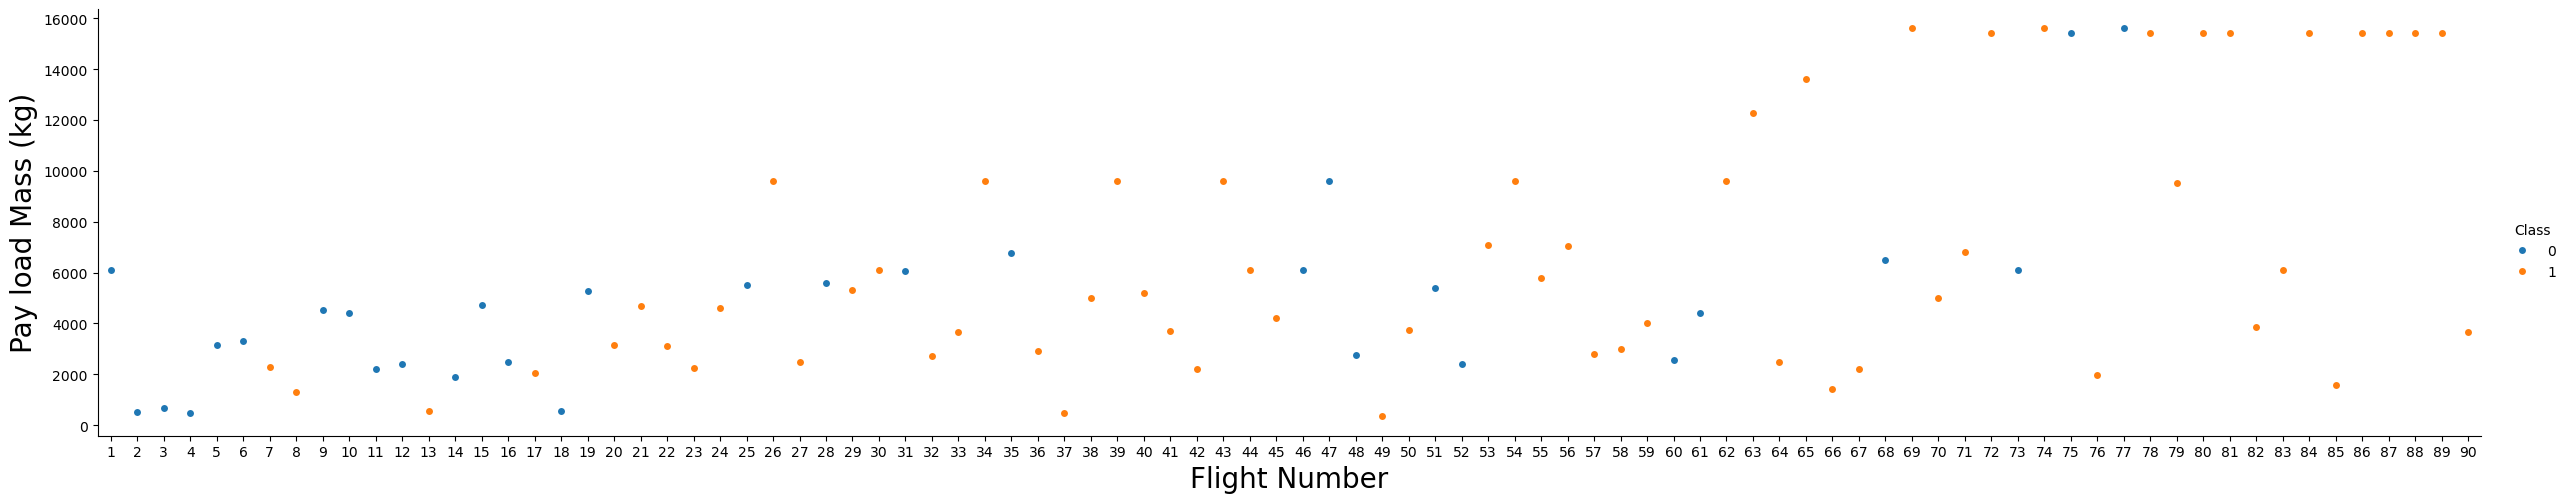

In [10]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

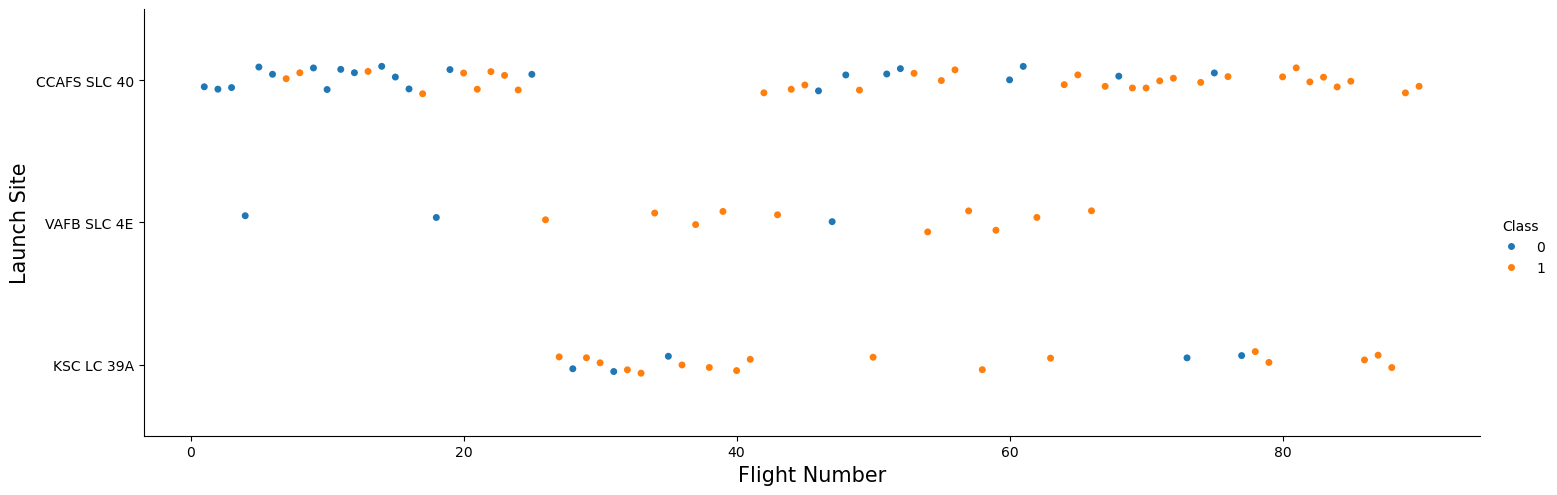

In [14]:


# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class
# We'll assume your DataFrame is named 'df'
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=3)

# Set labels for clarity
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)

# Display the plot
plt.show()

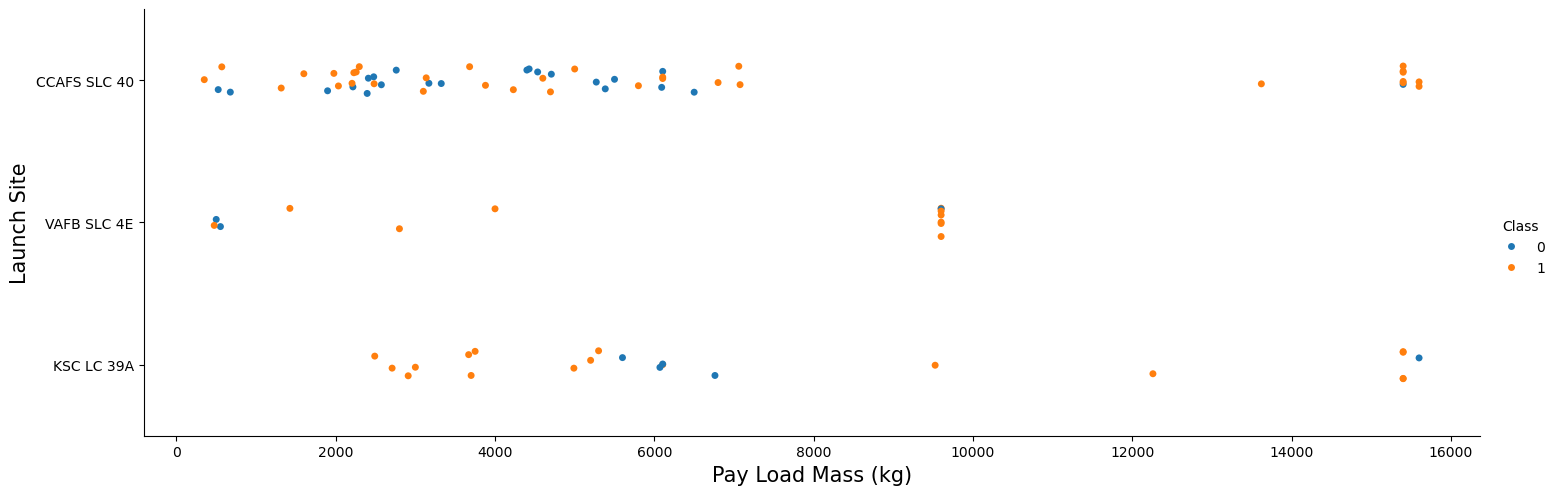

In [17]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
# We'll assume your DataFrame is still 'df'
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=3)

# Set labels for clarity
plt.xlabel("Pay Load Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)

# Display the plot
plt.show()

In [18]:
# HINT: use groupby method on Orbit column and get the mean of Class column
df_orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()

# Let's check our new data
print(df_orbit_success.head())

   Orbit     Class
0  ES-L1  1.000000
1    GEO  1.000000
2    GTO  0.518519
3    HEO  1.000000
4    ISS  0.619048


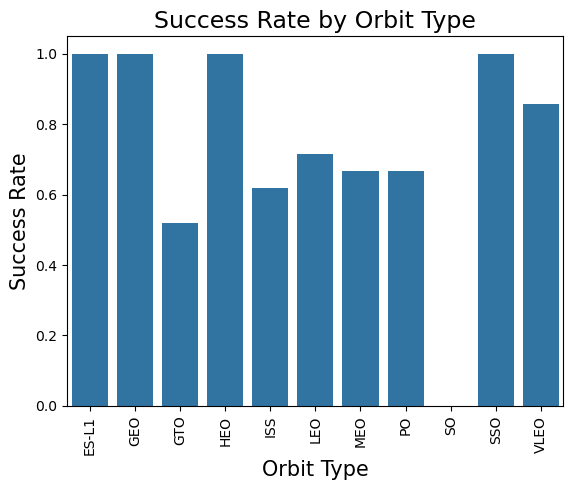

In [19]:
# Create the bar chart using our new DataFrame
sns.barplot(x="Orbit", y="Class", data=df_orbit_success)

# Set labels for clarity
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=17)

# This is important for long labels:
plt.xticks(rotation=90) 

# Display the plot
plt.show()

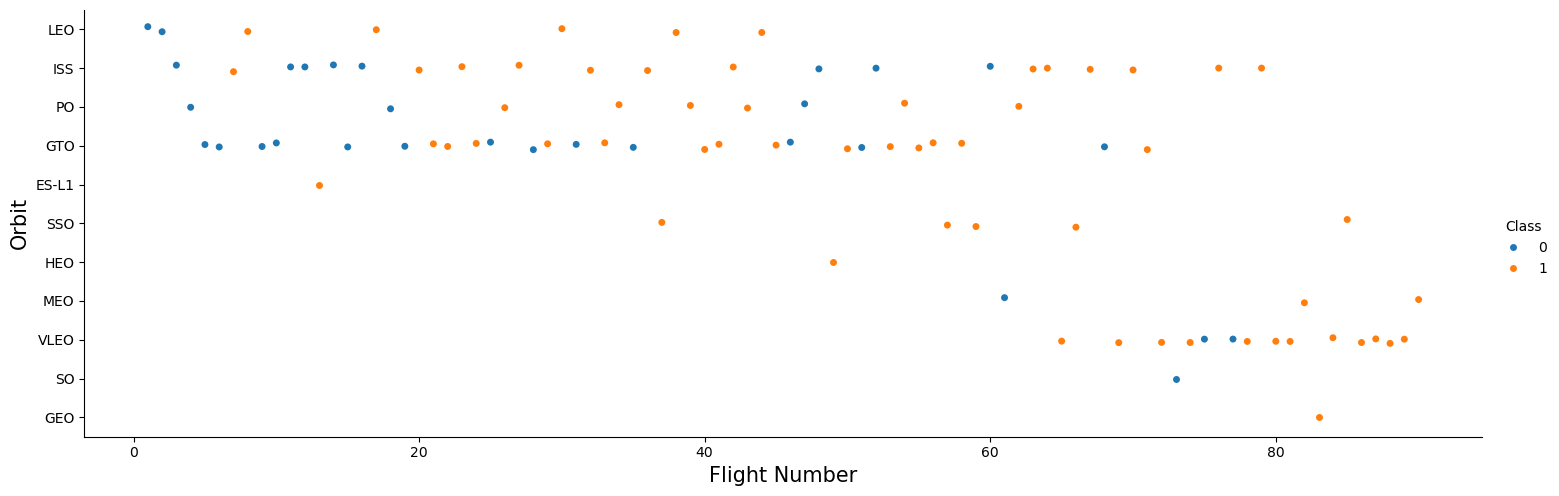

In [20]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=3)

# Set labels for clarity
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit", fontsize=15)

# Display the plot
plt.show()

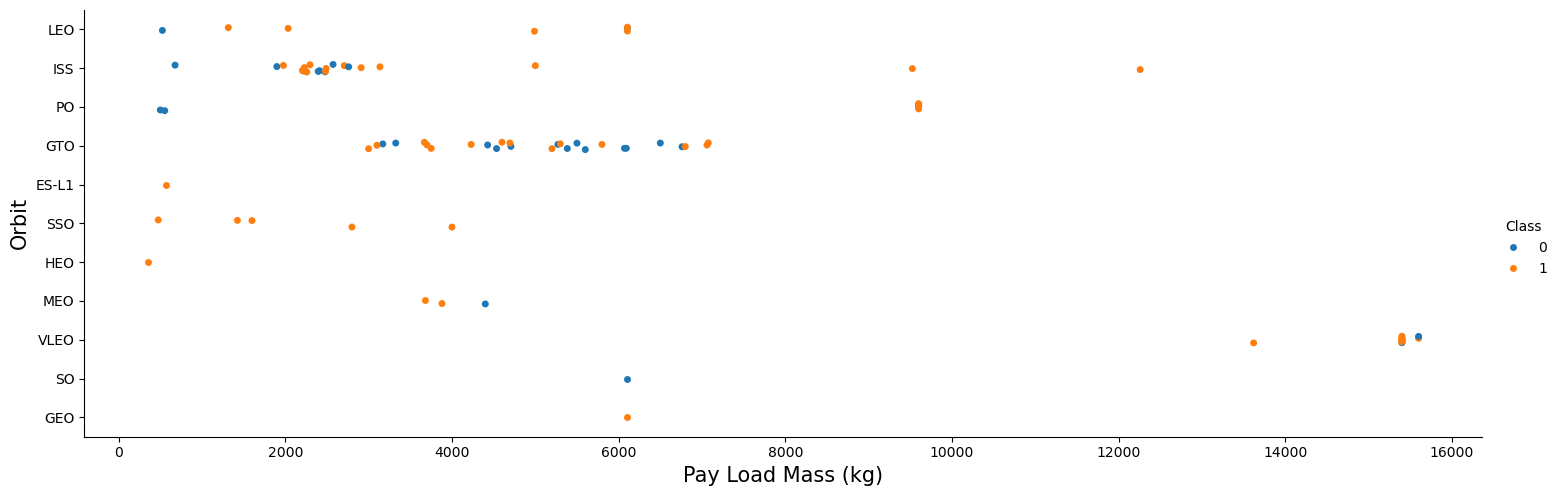

In [22]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
# Using the column name from our previous plot: "Pay Load Mass (kg)"
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=3)

# Set labels for clarity
plt.xlabel("Pay Load Mass (kg)", fontsize=15)
plt.ylabel("Orbit", fontsize=15)

# Display the plot
plt.show()

In [23]:
# A more "Pythonic" way to create the 'Year' column
# This .apply() method is cleaner than the for loop
df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])

# Now, create the new DataFrame for plotting
# HINT: use groupby method on Year column and get the mean of Class column
df_yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Check our new data
print(df_yearly_success.head())

   Year     Class
0  2010  0.000000
1  2012  0.000000
2  2013  0.000000
3  2014  0.333333
4  2015  0.333333


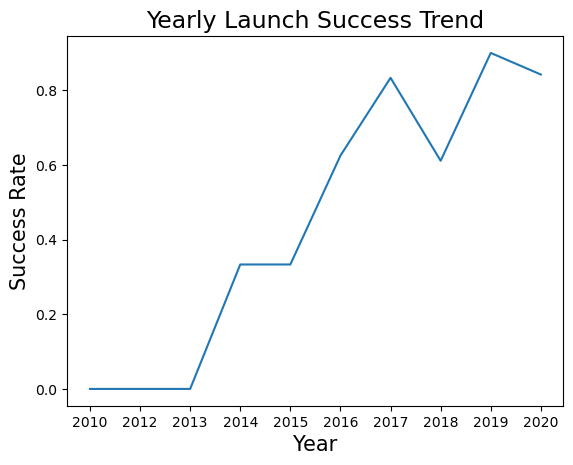

In [24]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(x="Year", y="Class", data=df_yearly_success)

# Set labels for clarity
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Yearly Launch Success Trend", fontsize=17)

# Display the plot
plt.show()

In [26]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the results using the .head() method
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')

# Let's check the new data types
print(features_one_hot.dtypes.head())

# We can now export it to a CSV
features_one_hot.to_csv('dataset_part_3.csv', index=False)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
dtype: object


In [28]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)